# Missing Values
Missing values occurs in dataset when some of the information is not sorted for a variable. There are three mechanism:
## 1. Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing mechanism in which the probability of a value being missing is unrelated to both the observed data and missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevelance of a certain disease, the missing data might be MCAR, if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.

## 2. Missing at Random (MAR):
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends on the observed data but not on the missing data itself. In other words, if the data is MAR, the missing values are systematic related to the observed data, but not the missing data. Here are a few examples of missing at random:

Income data: Suppose your are collecting income data from a group of people, but some participants choose not to report their income, if the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not want to report their blood pressure. If the patients who do not report their blodd pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

## 3. Missing data not at Random (MNAR)
Is is a type of missing data where the probability os missing value depends on the value of missing data itself. In other words if the data is MNAR, the missingness is not at random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

### Examples

In [1]:
#load titanic data from seaborn
import seaborn as sns
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# check missing values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [3]:
## Delete the rows or data point to handle missing values
df.shape

(891, 15)

In [4]:
df.dropna().shape

(182, 15)

In [5]:
## Column wise deletion
df.dropna(axis = 1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values

### 1. Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

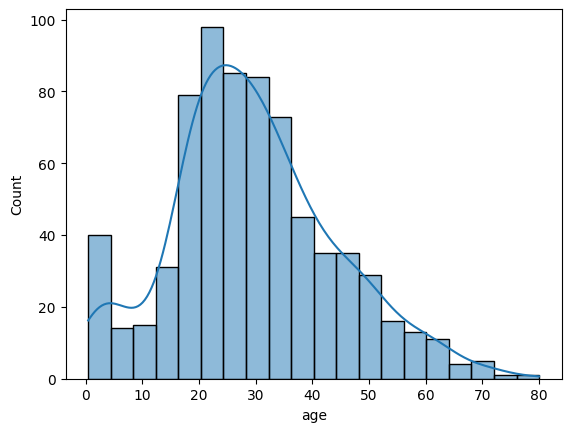

In [6]:
sns.histplot(df["age"], kde = True)

In [7]:
df["Age_mean"] = df["age"].fillna(df["age"].mean())
df[["age", "Age_mean"]]

,age,Age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [8]:
## Mean imputation works well when we have normally distributed data

### 2. Median Value Imputation - If we have outliers in the dataset

In [9]:
df["age_median"] = df["age"].fillna(df["age"].median())
df[["age", "age_median"]]

,age,age_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


## Mode Imputation Techniques - Categorical Variables

In [10]:
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [11]:
mode_value = df[df["embarked"].notna()]["embarked"].mode()[0]
mode_value

'S'

In [12]:
df["embarked_mode"] = df["embarked"].fillna(mode_value)
df[["embarked", "embarked_mode"]]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [13]:
df["embarked_mode"].isnull().sum()

0

# Handling Imbalanced Dataset

Initially you will be given a dataset and we want to solve a classification problem.

Suppose I have 1000 data points, The output variable has two outcomes (yes, no).
Suppose 900 data points have outcome value yes and 100 data points have outcome value no.

The model will get biased over outcome value no.

We will use two techniques.
1. Up Sampling
2. Down Sampling

In [14]:
import numpy as np
import pandas as pd

# set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [15]:
n_class_0, n_class_1

(900, 100)

In [16]:
# create my dataframe with imbalanced dataset
class_0 = pd.DataFrame({
    "feature_1": np.random.normal(loc = 0, scale = 1, size = n_class_0),
    "feature_2": np.random.normal(loc = 0, scale = 1, size = n_class_0),
    "target":[0]*n_class_0
})
class_1 = pd.DataFrame({
    "feature_1": np.random.normal(loc = 2, scale = 1, size = n_class_1),
    "feature_2": np.random.normal(loc = 2, scale = 1, size = n_class_1),
    "target":[1]*n_class_1
})

In [17]:
df = pd.concat([class_0, class_1]).reset_index(drop = True)
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [18]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [19]:
df["target"].value_counts()

,count
target,
0,900
1,100


In [20]:
#upsampling
df_minority = df[df["target"] == 1]
df_majority = df[df["target"] == 0]

In [21]:
from sklearn.utils import resample
df_minority_upsamples = resample(df_minority, replace = True, n_samples = len(df_majority),
         random_state = 42)

In [22]:
df_minority_upsamples.shape

(900, 3)

In [23]:
df_minority_upsamples.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [24]:
df_upsampled = pd.concat([df_majority, df_minority_upsamples])
df_upsampled["target"].value_counts()

,count
target,
0,900
1,900


In [25]:
## Down sampling
df_majority_downsampled = resample(df_majority, replace = False, n_samples = len(df_minority), random_state = 42)
df_majority_downsampled.shape


(100, 3)

In [26]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
df_downsampled.shape

(200, 3)

# SMOTE (Synthetic Minority Oversampling Technique)
SMOTE  (Synthetic Minority Oversampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between the existing values.
Joins two points and the create data points between them.

In [27]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_features=2,n_redundant = 0, n_clusters_per_class = 1, weights = [0.90], random_state = 42)

In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
import pandas as pd
df = pd.DataFrame(X, columns = ['f1', 'f2'])
df["target"] = y
df.head()

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0


In [30]:
df["target"].value_counts()

,count
target,
0,896
1,104


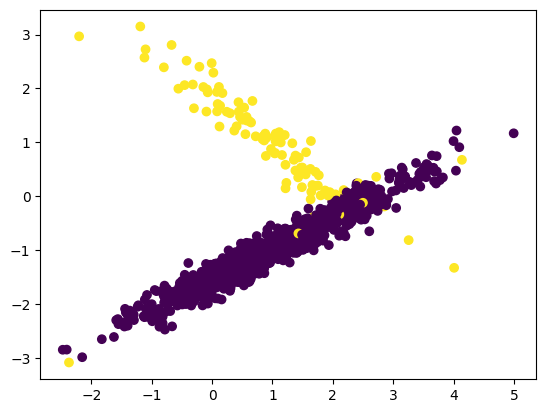

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df["f1"], df["f2"], c = df["target"])
plt.show()

In [34]:
!pip install imblearn

In [38]:
from imblearn.over_sampling import SMOTE

#transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(df[["f1", "f2"]], df["target"])

In [40]:
len(y[y==0])

896

In [41]:
len(y[y==1])

896

In [43]:
df1 = pd.DataFrame(X, columns = ["f1", "f2"])
df2 = pd.DataFrame(y, columns = ["target"])
oversample_df = pd.concat([df1, df2], axis = 1)
oversample_df

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
1787,1.402971,0.929303,1
1788,0.013508,2.268595,1
1789,1.078259,1.173382,1
1790,0.918680,0.756462,1


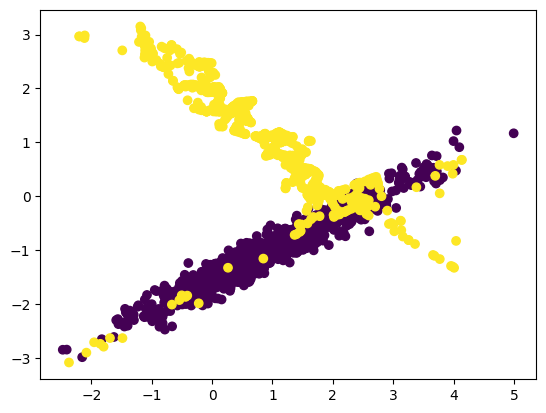

In [44]:
plt.scatter(oversmaple_df["f1"], oversample_df["f2"], c = oversample_df["target"])

# Handling Outliers Using Python

In [45]:
## Minimum, Maximum, Median, Q1, Q2, IQR
import numpy as np
lst_marks = [45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74]
minimum, Q1, median, Q3, maximum = np.quantile(lst_marks, [0, 0.25, 0.50, 0.75, 1.0])


In [46]:
minimum, Q1, median, Q3, maximum

(32.0, 54.0, 67.0, 89.0, 99.0)

In [47]:
IQR = Q3 - Q1
print(IQR)

35.0


In [48]:
lower_fence = Q1 - 1.5*IQR
higher_fence = Q3 + 1.5*IQR
print(lower_fence, higher_fence)

1.5 141.5


<Axes: >

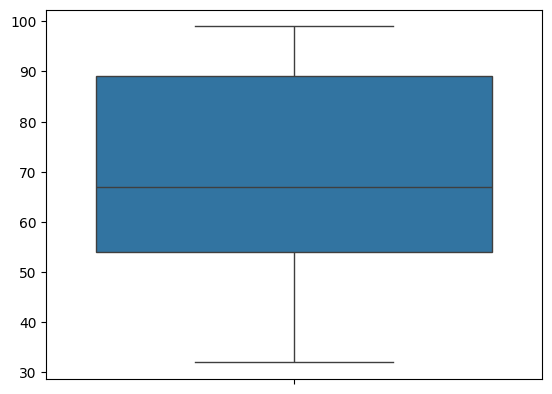

In [49]:
import seaborn as sns
sns.boxplot(lst_marks)

In [51]:
lst_marks = [-100, -200, 45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74, 150, 175, 180]

<Axes: >

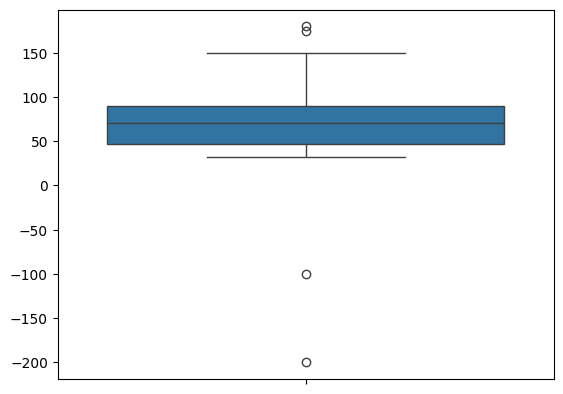

In [52]:
sns.boxplot(lst_marks)

# Data Encoding - Nominal or OHE

Converting categorical features to numerical is known as data encoding.
1. Nominal/OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding

## Nominal/OHE Encoding
One hot encoding also known as nominal encoding, is a technique used to represent categorical data as numerical data, which is more suitable for machine learning algorithms. In this technique, each category is represented as a binary vector where each bit corressponds to u unique category. For example if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it with one hot encoding as follow:

    1. Red:    [1, 0, 0]
    2. Green:  [0, 1, 0]
    3. Blue:   [0, 0, 1]

If I have too many categories then we may not use One Hot Encoding because it will create a lot of new features. The other issue is sparse matrix, which may leads to overfitting.

In [53]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [54]:
# create a simple data frame
df = pd.DataFrame({"color": ["red", "blue", "green", "green", "red", "blue"]})
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [58]:
# create an instance of OneHotEncoder
ohe = OneHotEncoder()

## perform fit and transform
encoded_values = ohe.fit_transform(df[["color"]]).toarray()
encoded_df = pd.DataFrame(encoded_values, columns = ohe.get_feature_names_out())

In [59]:
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [61]:
ohe.transform([["blue"]]).toarray()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [64]:
pd.concat([df, encoded_df], axis = 1)


,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [73]:
import seaborn as sns
tips = sns.load_dataset("tips")
categorical_features = ["sex", "smoker", "day", "time"]
encoder = OneHotEncoder(sparse_output = False, drop = "first")
encoded_data = encoder.fit_transform(tips[categorical_features])
encoded_data = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(categorical_features))
final_tips = pd.concat([tips.drop(columns = categorical_features), encoded_data], axis = 1)
final_tips.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0.0,0.0,0.0,1.0,0.0,0.0
1,10.34,1.66,3,1.0,0.0,0.0,1.0,0.0,0.0
2,21.01,3.50,3,1.0,0.0,0.0,1.0,0.0,0.0
3,23.68,3.31,2,1.0,0.0,0.0,1.0,0.0,0.0
4,24.59,3.61,4,0.0,0.0,0.0,1.0,0.0,0.0


### Label Encoding

Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data.

Label encoding involces assigning a unique numerical label to each category in the variable. The labels are usually assigned in alphabetical order based on the frequency of categories. For example, if we have a categorical variable "color" with three possible values (red, green, blu), we can represent it using lable encoding as follows:
1. Red: 1
2. Green: 2
3. Blue: 3

In [74]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df[["color"]])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [80]:
le.transform([["green"]])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1])

The machine learning model will think that 2 is greater than 1, and 1 is greater than 0.

### Ordinal Encoding
It is used to encode categorical data that have an intrinsic order or rankin. In this technique, each category is assigned a numerical value based on its position in the order. For example, if we have a categorical variable "education level" with four possible values high school, college, graduate, post-graduate, we can represent it using ordinal encoding as follows:
1. High School: 1
2. College: 2
3. Graduate: 3
4. Post Graduate: 4



In [82]:
df = pd.DataFrame({"size": ["small", 'medium', "large", "medium", "small", "large"]})
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [84]:
## Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories = [["small", "medium", "large"]])
ordinal_encoder.fit_transform(df[["size"]])


array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [86]:
ordinal_encoder.transform([["small"]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

# Target Guided Ordinal Encoding
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numeric value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [87]:
df = pd.DataFrame({
    "city": ["New York", "London", "Paris", "Tokyo", "New York", "Paris"],
    "price": [200, 150, 300, 250, 180, 320]
})
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [90]:
mean_price = df.groupby("city")["price"].mean().to_dict()
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [91]:
df["city_encoded"] = df["city"].map(mean_price)
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0
